In [39]:
import pathlib
import pandas as pd
import numpy as np 
import matplotlib as plt

In [52]:
#Establish project path and data directroy

PATH = pathlib.Path().resolve()
DATA_DIR = PATH / 'Excel_Optional_Raptors/data/falcons/Raptors_Pinnacles_Handout'
PRJOECT = PATH / 'Excel_Optional_Raptors/project/falcons'
PATH

PosixPath('/home/nick-luempert/data/AdvGIS')

In [53]:
#import excel file to pandas dataframe

raptors_df = pd.read_excel(DATA_DIR / 'Raptors_Pinnacles_Handout.xlsx')

raptors_df.head()

,Month,Hawks,Falcons,Condors
0,Jan,8,17,14
1,Feb,17,4,2
2,Mar,14,29,6
3,Apr,32,18,19
4,May,40,88,17


In [54]:
#attempt to scrape climate table from website

url = 'https://wrcc.dri.edu/cgi-bin/cliRECtM.pl?capinn'
tables = pd.read_html(url)

#Assign dataframe as the first table on the webpage and remove # index
climate_df = tables[0]
climate_df = climate_df.set_index(0)
climate_df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,,,,,,,,,,,,,
Average Max. Temperature (F),61.00,63.70,66.10,71.9,79.50,88.00,95.40,95.00,90.70,81.70,69.50,62.0,77.00
Average Min. Temperature (F),32.70,35.20,36.70,38.8,42.80,46.70,50.50,50.20,48.10,42.60,37.00,33.0,41.20
Average Total Precipitation (in.),3.23,2.93,2.97,1.3,0.45,0.07,0.03,0.06,0.22,0.76,1.77,2.8,16.61
Average Total SnowFall (in.),0.20,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.30
Average Snow Depth (in.),0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00


In [55]:
#Transpose dataframe and reset index to match excel file

climate_df = np.transpose(climate_df)
climate_df.index = range(len(climate_df))
climate_df.head()

,Average Max. Temperature (F),Average Min. Temperature (F),Average Total Precipitation (in.),Average Total SnowFall (in.),Average Snow Depth (in.)
0,61.0,32.7,3.23,0.2,0.0
1,63.7,35.2,2.93,0.0,0.0
2,66.1,36.7,2.97,0.0,0.0
3,71.9,38.8,1.30,0.0,0.0
4,79.5,42.8,0.45,0.0,0.0


In [56]:
#Join web index to excel dataframe on number index

final_df = raptors_df.join(climate_df)
final_df = final_df.set_index('Month')
final_df.head()

,Hawks,Falcons,Condors,Average Max. Temperature (F),Average Min. Temperature (F),Average Total Precipitation (in.),Average Total SnowFall (in.),Average Snow Depth (in.)
Month,,,,,,,,
Jan,8,17,14,61.0,32.7,3.23,0.2,0.0
Feb,17,4,2,63.7,35.2,2.93,0.0,0.0
Mar,14,29,6,66.1,36.7,2.97,0.0,0.0
Apr,32,18,19,71.9,38.8,1.30,0.0,0.0
May,40,88,17,79.5,42.8,0.45,0.0,0.0


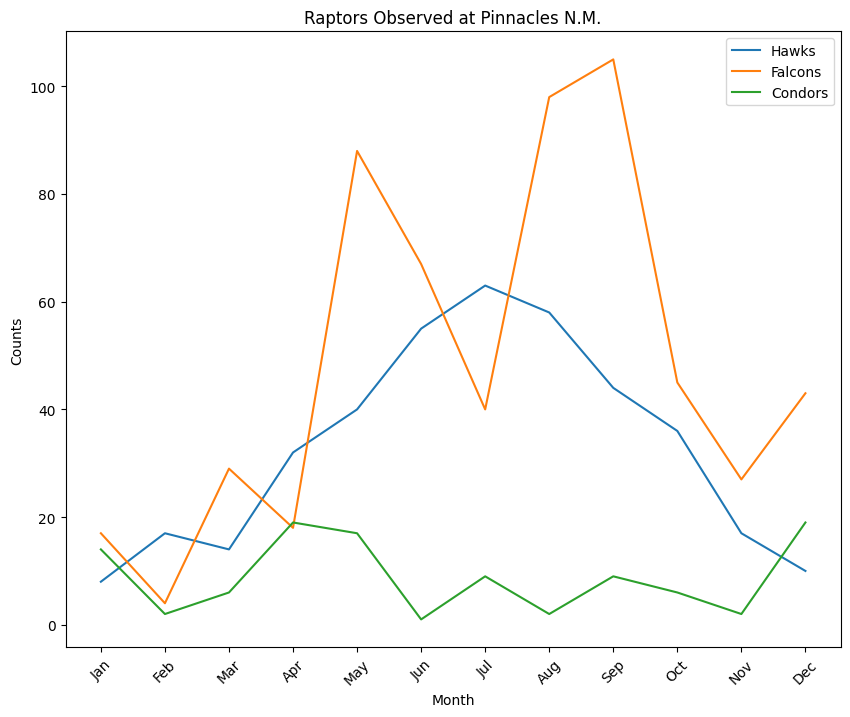

In [57]:
ax = final_df[['Hawks', 'Falcons', 'Condors']].plot(figsize=(10, 8))

ax.set_xticks(range(len(final_df.index)))
ax.set_xticklabels(final_df.index, rotation=45)
ax.set_ylabel('Counts')
ax.set_title('Raptors Observed at Pinnacles N.M.')

plt.pyplot.show()